<a href="https://colab.research.google.com/github/coutinhoware/data-science/blob/main/ALURA/Redes%20Neurais%20Convolucionais%20-%20Deep%20Learning%20com%20PyTorch/3_3_Filtros_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALURA/Redes Neurais Convolucionais - Deep Learning com PyTorch/

In [8]:
import matplotlib.pyplot as plt
from skimage import io

from scipy.signal import convolve

import numpy as np

%matplotlib inline

In [14]:
def show(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15,5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

In [4]:
! wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

--2022-04-30 14:10:02--  https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 54.231.130.136
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|54.231.130.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82709 (81K) [image/jpeg]
Saving to: ‘GUI.jpg’

GUI.jpg             100%[===================>]  80.77K  --.-KB/s    in 0.04s   

2022-04-30 14:10:03 (1.91 MB/s) - ‘GUI.jpg’ saved [82709/82709]



(360, 330, 3)


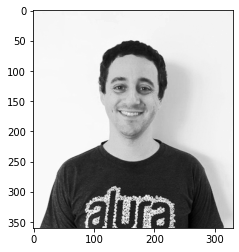

In [5]:
img = io.imread('GUI.jpg')
print(img.shape)

img = img[:,:,0]
plt.imshow(img, cmap='gray')

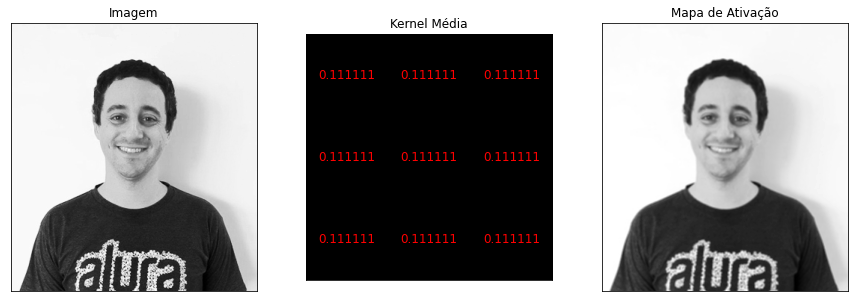

In [12]:
# Filtro de média 3x3

N = 3
kernel_media = np.zeros((N,N))
kernel_media[:] = 1.0/(N**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')

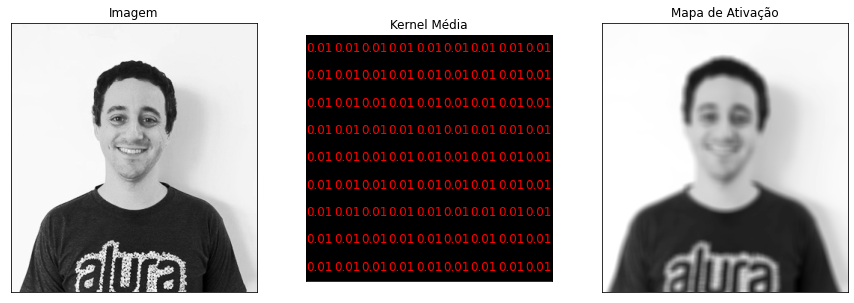

In [15]:
# Filtro de média 9x9

N = 9
kernel_media = np.zeros((N,N))
kernel_media[:] = 1.0/(N**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


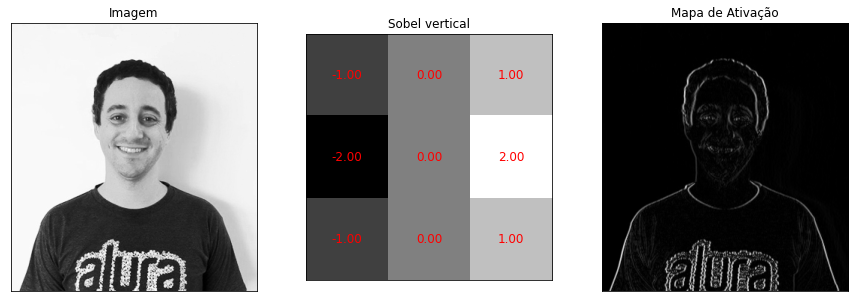

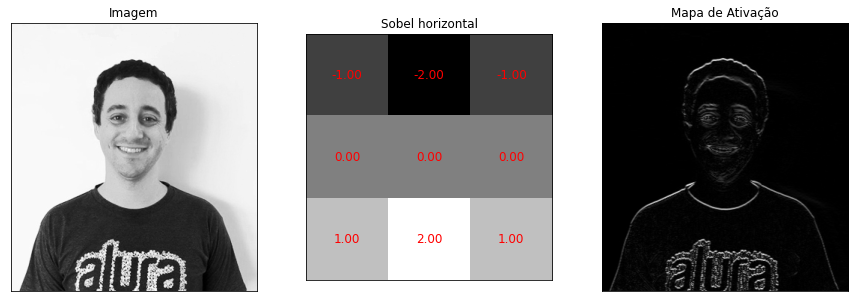

In [20]:
# Filtro Sobel

## Sobel vertical
sobel_v = np.zeros((3,3))
sobel_v[:,0] = -1
sobel_v[:,2] = 1
sobel_v[1,[0, 2]] = [-2, 2]
print(sobel_v)

resultado = convolve(img, sobel_v, mode='valid')
# show(img, sobel_v, resultado, 'Sobel vertical')
show(img, sobel_v, np.abs(resultado), 'Sobel vertical')

## Sobel horizontal
sobel_h = np.zeros((3,3))
sobel_h[0,:] = -1
sobel_h[2,:] = 1
sobel_h[[0, 2], 1] = [-2, 2]
print(sobel_h)

resultado = convolve(img, sobel_h, mode='valid')
# show(img, sobel_h, resultado, 'Sobel horizontal')
show(img, sobel_h, np.abs(resultado), 'Sobel horizontal')

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


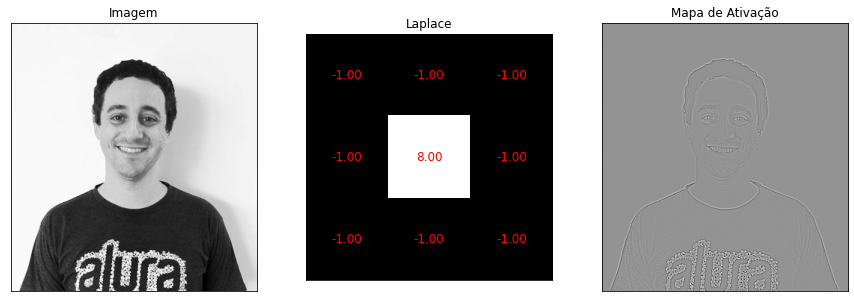

In [24]:
# Filtro de Laplace

laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
print(laplace)

resultado = convolve(img, laplace, mode='valid')
show(img, laplace, resultado, 'Laplace')
# show(img, laplace, np.abs(resultado), 'Laplace')